# 이변량 분석 (2)

In [2]:
# 라이브러리 불러오기

import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst
import numpy as np
import random as rd
import statsmodels.api as sm

# 데이터 불러오기
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
iris = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv')
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')

### 3) 범주 vs 숫자

* 범주별 숫자를 비교할 때 중요한 관점은 '평균'이다.

> 시각화 : barplot, boxplot  
> 수치화(가설검정 도구) : t-test, anova

* barplot

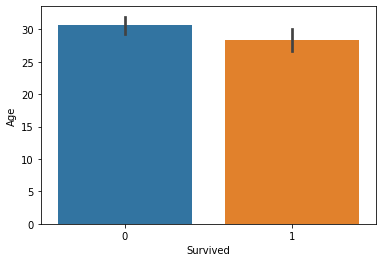

In [2]:
sns.barplot(x='Survived', y='Age', data=titanic)
plt.show()

> 생존 여부별 나이 평균의 차이가 크지 않아보인다.

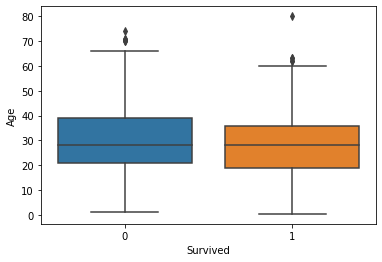

In [3]:
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.show()

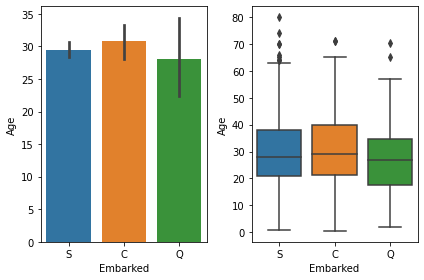

In [7]:
plt.subplot(1, 2, 1)
sns.barplot(x='Embarked', y='Age', data=titanic)

plt.subplot(1, 2, 2)
sns.boxplot(x='Embarked', y='Age', data=titanic)

plt.tight_layout()
plt.show()

> 승선지별 나이 평균차가 크지 않아 보인다.  
> Q : 신뢰구간이 넓어서 신뢰성이 떨어진다.

* t-test (t 검정)

In [10]:
# 결측치 처리
tmp = titanic.loc[titanic['Age'].notnull()]

# 범주별로 데이터 나누기
survived = tmp.loc[tmp['Survived'] == 1, 'Age']
died = tmp.loc[tmp['Survived'] == 0, 'Age']

# t-test
spst.ttest_ind(died, survived)

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

> p-value가 0.05 미만이므로 생존 여부에 따른 나이 평균의 차이가 있다는 가설은 참

* anova (분산 분석)

In [13]:
tmp = titanic.loc[titanic['Age'].notnull()]

P_1 = tmp.loc[tmp['Pclass'] == 1, 'Age']
P_2 = tmp.loc[tmp['Pclass'] == 2, 'Age']
P_3 = tmp.loc[tmp['Pclass'] == 3, 'Age']

spst.f_oneway(P_1, P_2, P_3)

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

In [14]:
temp = titanic.loc[titanic['Embarked'].notnull()]

e_s = temp.loc[temp['Embarked'] == 'S', 'Fare']
e_c = temp.loc[temp['Embarked'] == 'C', 'Fare']
e_q = temp.loc[temp['Embarked'] == 'Q', 'Fare']

spst.f_oneway(e_s, e_c, e_q)

F_onewayResult(statistic=38.14030520011266, pvalue=1.2896450252631794e-16)

> 통계량을 비교해보면, Embarked 보다 Pclass의 통계량이 더 크다.  
> 따라서, Age에 대하여 Pclass가 더 중요한 변수이다.

### 4) 숫자 vs 범주

> 시각화 : histogram, densityplot  
> 수치화(가설검정 도구) : 로지스틱 회귀 모델

* histogram

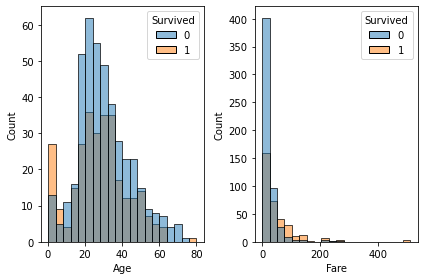

In [39]:
plt.subplot(1, 2, 1)
sns.histplot(x='Age', data=titanic, bins=20, hue='Survived')

plt.subplot(1, 2, 2)
sns.histplot(x='Fare', data=titanic, bins=20, hue='Survived')

plt.tight_layout()
plt.show()

* densityplot


타이타닉호 생존율:  0.3838383838383838


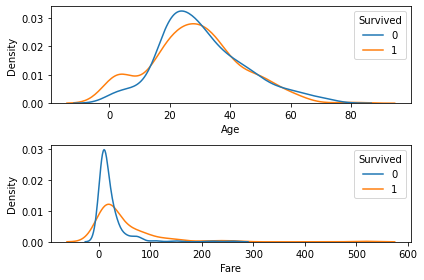

In [10]:
print('\n타이타닉호 생존율: ', titanic['Survived'].mean())

plt.subplot(2, 1, 1)
sns.kdeplot(x='Age', data=titanic, hue='Survived', common_norm=False)

plt.subplot(2, 1, 2)
sns.kdeplot(x='Fare', data=titanic, hue='Survived', common_norm=False)

plt.tight_layout()
plt.show()

* Age
> 0 ~ 10대 후반 : 전체 생존율인 38% 보다 높은 생존율을 보인다.  
> 10대 후반 ~ 30대 중반, 60 ~ 80대 : 전체 사망률보다 높은 사망률을 보인다.

* Fare  
> 0 ~ 50 : 전체 사망률보다 높은 사망률을 보인다.  
> 50 ~ : 전체 생존률보다 높은 생존율을 보인다.

* 로지스틱 회귀 모델 : 숫자 --> 범주 분석을 위한 미봉책 (적절한 가설검정 도구 X)

In [44]:
titanic2 = titanic.loc[titanic['Age'].notnull()]
model = sm.Logit(titanic2['Survived'], titanic2['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.672504
         Iterations 4
Age    9.909841e-08
dtype: float64


In [45]:
model = sm.Logit(titanic['Survived'], titanic['Fare'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4
Fare    0.014925
dtype: float64


> 그래프 상으로는 Fare별 생존 여부 차이가 더 커보였다.  
> 그런데 변수가 Age일 때 pvalue가 훨씬 0에 가깝다.